<a href="https://colab.research.google.com/github/RafaelAnga/Artificial-Intelligence/blob/main/ANN_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: Artificial Neural Network for Bank Customer Churn Prediction

This code implements an Artificial Neural Network (ANN) to predict customer churn in a banking context. Customer churn, or customer attrition, is when customers stop doing business with a company. This predictive model helps banks identify customers who are likely to leave, allowing for proactive retention measures.

The model uses various customer attributes including:

* Demographics (Geography, Gender, Age)
* Banking relationship factors (Credit Score, Tenure, Balance)
* Product usage (Number of Products, Credit Card ownership)
* Engagement metrics (Activity Status, Estimated Salary)

### Importing the libraries

In [ ]:
# Import essential libraries
import numpy as np              # For numerical operations
import pandas as pd            # For data manipulation
import tensorflow as tf        # For building neural networks

In [ ]:
tf.__version__

'2.17.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
# Connect to Google Drive and set working directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Google Drive to access data (Colab-specific)
import os
os.chdir('/content/drive/ANN/DataSets')

#Lists the directories
os.listdir()

['Churn_Modelling.csv']

In [ ]:
# Extract features (X) and target variable (y)
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
# Convert gender to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
# Convert Geography to numerical values using One-Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
# Split data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
# Scale features to normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
# Initialize the sequential neural network
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
# Add first hidden layer with 6 neurons and ReLU activation
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
# Add second hidden layer with 6 neurons and ReLU activation
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
# Add output layer with sigmoid activation for binary classification
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #for non binary classification -> softmax

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
# Compile the model with appropriate optimizer and loss function
ann.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy']) #loss = ' categorical_crossentropy for non binary classification -> more than 2

### Training the ANN on the Training set

In [ ]:
# Train the model
ann.fit(X_train, y_train, batch_size = 32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5203 - loss: 0.6863
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4892
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8036 - loss: 0.4464
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8139 - loss: 0.4288
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.4211
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8379 - loss: 0.3909
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.3761
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.3788
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3568
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3617
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8460 - loss: 0.3707
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Example**

We will utilize the model in predict if a customer with the following parameters will leave the bank or not.

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000


In [ ]:
#The model predicts that the customer will not leave the bank
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[False]]


**Solution**

### Predicting the Test set results

In [ ]:
# Make predictions on test data
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

[[1519   76]
 [ 200  205]]


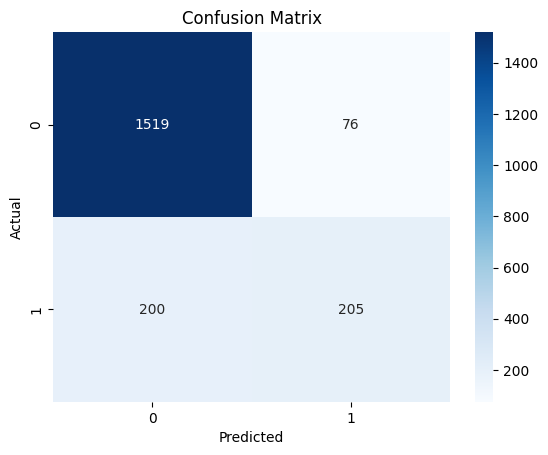

[[1519   76]
 [ 200  205]]


0.862

In [ ]:
# Create and visualize confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)
accuracy_score(y_test, y_pred)

## Project Summary: Bank Customer Churn Prediction using Artificial Neural Network

Purpose of the Project: This project implements an Artificial Neural Network to predict customer churn in banking, helping institutions proactively identify and retain customers who might leave.

Workflow Overview:

1. Dataset Preparation:
* Uses bank customer data with various features
* Target variable is binary (0 for retained, 1 for churned)
* Data loaded from 'Churn_Modelling.csv'

2. Data Preprocessing:
* Categorical data encoding (Gender and Geography)
* Feature scaling using StandardScaler
* Data split into 80% training and 20% testing sets

3. Model Architecture:
* Sequential neural network with three layers
* Two hidden layers with 6 neurons each using ReLU activation
* Output layer with sigmoid activation for binary classification

4. Training and Prediction:
* Model trained using Adam optimizer
* Binary cross-entropy loss function
* 100 epochs with batch size of 32
* Can make individual and batch predictions

5. Performance Evaluation:
* Confusion Matrix visualization
* Accuracy score calculation
* Visual representation using heatmap

6. Business Applications:
* Predicts customer churn probability
* Enables proactive customer retention strategies
* Supports data-driven decision making
* Helps in resource allocation for customer retention
___________
This ANN implementation provides a sophisticated solution for predicting customer churn, enabling banks to take preemptive actions to retain valuable customers and optimize their customer retention strategies.